# COMP 7150 Assignment 2 SOLUTION

---
**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**Each problem is worth 15 points**

This assignment uses the movielens dataset.  You can start with the code below.

In [1]:
import pandas

# Load individual tables
users = pandas.read_csv('../Datasets/movielens/users.csv')
ratings = pandas.read_csv('../Datasets/movielens/ratings.csv')
movies = pandas.read_csv('../Datasets/movielens/movies.csv')

# Merge tables
mr = pandas.merge(users, ratings)
data = pandas.merge(movies, mr)


---

**Problem 1**

What are the top-10 best rated genres?

Explain the steps you carry out to get the answer and report your finding.

ANSWER:

There are different ways to get the same answer.

We group the data into each genres, and calculate the average and count of ratings in each group.  

Then, we order the groups based on their average ratings.


In [11]:
df = data[['genres','rating']].groupby('genres').mean().sort_values(by='rating', ascending=False)
df[0:10]


,rating
genres,
Animation|Comedy|Thriller,4.473837
Sci-Fi|War,4.449890
Animation,4.394336
Film-Noir|Mystery,4.367424
Adventure|War,4.346107
Film-Noir|Romance|Thriller,4.294382
Action|Adventure|Drama|Sci-Fi|War,4.292977
Film-Noir|Sci-Fi,4.273333
Crime|Film-Noir,4.264129


---

**Problem 2**

Here we are only interested in popular genres, each of which has at least 5000 ratings.

What are the top-5 best rated genres among these popular genres?

Explain the steps you carry out to get the answer, and report your finding.

ANSWER:

There are different ways of doing this.  You can do this in multiple stages, where you select the popular genres first, and then calculate the average ratings of the remaining popular genres.

Here, we can group the data into groups of same genres, then caculate both the count and average of ratings.

These are the top-5 best rated genres:
+ 'Action|Crime|Drama', 
+ 'Drama|War', 
+ 'Action|Drama|War',
+ 'Drama|Romance|War', 
+ 'Documentary'
       

In [25]:
df = data[['genres','rating']].groupby('genres').agg(['mean','count'])
df = df['rating']
df = df.sort_values(by='mean', ascending=False)
popular = df[(df['count'] >= 5000)]
popular[0:5]

,mean,count
genres,,
Action|Crime|Drama,4.110883,6809
Drama|War,4.098936,14656
Action|Drama|War,4.047693,12224
Drama|Romance|War,3.962780,6663
Documentary,3.960734,6265


---

**Problem 3**

Among the top-5 best rated genres you found in the previous problem, what are the top-20 best rated movies, each of which has at least 100 reviews?

Explain the steps you carry out to get the answer, and report your finding.

ANSWER:

+ First the top-5 best-rated genres.
+ Get the movies in these genres.
+ Group the data into groups of same movies, average & count ratings in each group.
+ Select the top-20 highest rated movies.

In [35]:
df = data[['rating','genres']].groupby('genres').agg(['mean','count'])
df = df['rating']
df = df.sort_values(by='mean', ascending=False)
df = df[ (df['count'] >= 5000) ]
df = df[0:5]
best_genres = df.index
best_genres

Index(['Action|Crime|Drama', 'Drama|War', 'Action|Drama|War',
       'Drama|Romance|War', 'Documentary'],
      dtype='object', name='genres')

In [53]:
Q = data.genres.isin(best_genres)
df = data[Q]
df = df[['title','rating']].groupby('title').agg(['mean','count'])
df = df['rating']
df = df[ (df['count']>100) ]
df = df.sort_values(by='mean', ascending=False)
top20 = df[0:20]
top20

,mean,count
title,,
"Godfather, The (1972)",4.524966,2223
Schindler's List (1993),4.510417,2304
Paths of Glory (1957),4.473913,230
Casablanca (1942),4.412822,1669
"Bridge on the River Kwai, The (1957)",4.386994,938
"Godfather: Part II, The (1974)",4.357565,1692
"Grand Illusion (Grande illusion, La) (1937)",4.339394,165
Saving Private Ryan (1998),4.337354,2653
When We Were Kings (1996),4.321300,277


---

**Problem 4**

Visualize the popularity (rating count) versus quality (average rating) of the top-20 best-rated movies you found in the previous problem.

Explain the steps you carry out to get the answer, and report your finding. In particular, draw some conclusions about movies that are both popular and highly rated.



ANSWER:

+ Popularity (rating count) and quality (rating average) are both numerical.  We'll use "relplot" to visualize the individual data points.

+ Godfather and Schindler's List are both rated highest, and among the most popular.

In [54]:
top20

,mean,count
title,,
"Godfather, The (1972)",4.524966,2223
Schindler's List (1993),4.510417,2304
Paths of Glory (1957),4.473913,230
Casablanca (1942),4.412822,1669
"Bridge on the River Kwai, The (1957)",4.386994,938
"Godfather: Part II, The (1974)",4.357565,1692
"Grand Illusion (Grande illusion, La) (1937)",4.339394,165
Saving Private Ryan (1998),4.337354,2653
When We Were Kings (1996),4.321300,277


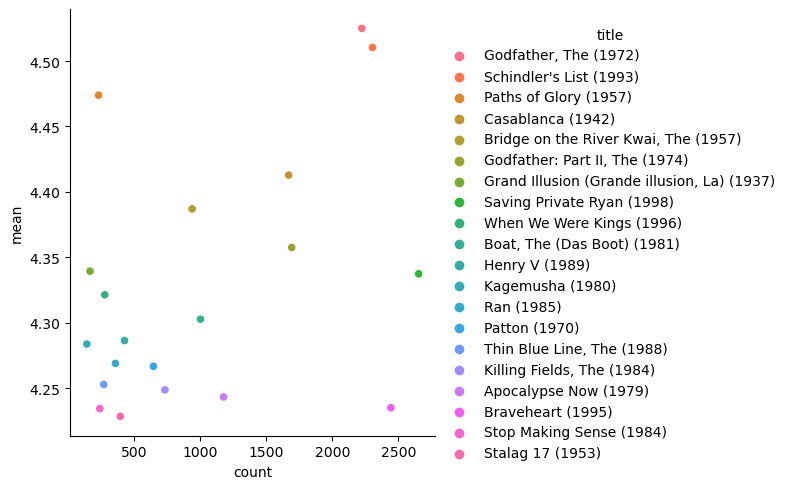

In [55]:
import seaborn
from matplotlib import pyplot
seaborn.relplot(data=top20, x='count', y='mean', hue=top20.index)
pyplot.show()

---

**Problem 5**

Based on your findings in the previous problem, recommend 4 movies that your friends should see.  Provide a simple justification for your recommendation based on your analysis.

ANSWER:

There are multiple "correct" answers.  One way is to recommend the two most popular and the two highest rated.

In [56]:
j = [0,1,7,17]
print(top20.iloc[j].index)

Index(['Godfather, The (1972)', 'Schindler's List (1993)',
       'Saving Private Ryan (1998)', 'Braveheart (1995)'],
      dtype='object', name='title')


---

**Problem 6**

Among the 4 movies you recommended, on average, which ones are preferred by males and which ones are prefered by females?

Explain the steps you carry out to get the answer, and report your finding.

ANSWER:

+ First, get the data and see what it looks like.
+ Pivot the data on gender, with rating as "values" and title as "index".
+ The movies most preferred by males is: Godfather.
+ The movies most preferred by females is: Schindler's List.


In [64]:
j = [0,1,7,17]
# top20.iloc[j].index
Q = data.title.isin( top20.iloc[j].index )
top4 = data[Q]
top4.pivot_table(columns='gender', values='rating', index='title', aggfunc='mean')

gender,F,M
title,,
Braveheart (1995),4.016484,4.297839
"Godfather, The (1972)",4.314700,4.583333
Saving Private Ryan (1998),4.114783,4.398941
Schindler's List (1993),4.562602,4.491415


---

**Problem 7**

Among the 4 movies you recommended, on average, (A) which movie is most liked by the 18 age-group?  (B) which movie is most liked by all age groups?


Explain the steps you carry out to get the answer, and report your finding.

ANSWER:

+ Similar steps to the previous problem. Here, we pivot the data on "age". (Because the question asks for a comparison of preference in different age groups).

+ The 18 age-group likes Godfather the most.

+ We will average the ratings for each movie across all age groups.  Why, because the question asks us to compare preferences overall all age groups.

+ Schindler's List is the movies that is liked the most by all age groups.

In [69]:
j = [0,1,7,17]
print(top20.iloc[j].index)
recommended = data[ data.title.isin(top20.iloc[j].index)]
df = recommended.pivot_table(index='title',values='rating',columns='age',aggfunc='mean')
# df4['total'] = df4.mean(axis=1)
df

Index(['Godfather, The (1972)', 'Schindler's List (1993)',
       'Saving Private Ryan (1998)', 'Braveheart (1995)'],
      dtype='object', name='title')


age,1,18,25,35,45,50,56
title,,,,,,,
Braveheart (1995),4.192982,4.406250,4.254292,4.152318,4.119048,4.099476,3.969388
"Godfather, The (1972)",4.471698,4.505495,4.574051,4.541935,4.357843,4.540404,4.467213
Saving Private Ryan (1998),4.378049,4.287293,4.291052,4.390873,4.364929,4.485714,4.438017
Schindler's List (1993),4.446429,4.472851,4.485346,4.510345,4.591549,4.565476,4.620438


In [71]:
df.mean(axis=1)

title
Braveheart (1995)             4.170536
Godfather, The (1972)         4.494091
Saving Private Ryan (1998)    4.376561
Schindler's List (1993)       4.527490
dtype: float64

#### Additional note of visualization

This is an in-group comparison.  We see a difference between GodFather and Schindler's List. But their average ratings are actually pretty close.

The reason is that the y-range is selected (autoamatically by seaborn) for an in-group comparison.

Sometimes, it's more accurate, less misleading to provide a reference range.

For example, we can set the y-range to [1, 5].

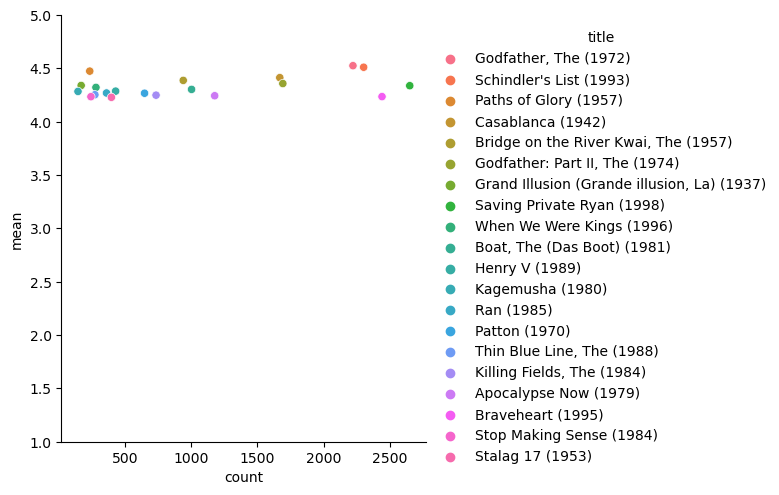

In [82]:
import seaborn
from matplotlib import pyplot
seaborn.relplot(data=top20, x='count', y='mean', hue=top20.index)
pyplot.ylim(1,5)
pyplot.show()

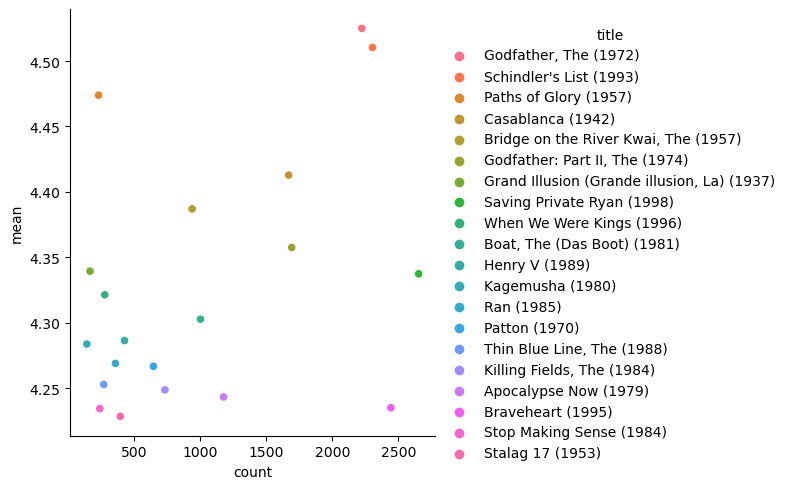

In [84]:
import seaborn
from matplotlib import pyplot
seaborn.relplot(data=top20, x='count', y='mean', hue=top20.index)
pyplot.show()